In [157]:
import duckdb
import pandas as pd
import requests
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [141]:
#df = pd.read_csv("../data/df_baseline.csv")
#df = pd.read_csv("../data/training_datasets/one_hot_PCA_minmax.csv")
df = pd.read_csv("../data/training_datasets/one_hot_minmax.csv")
#df = pd.read_csv("../data/...")

In [142]:
y = df['price'].values
y

array([ 505, 2686,  738, ..., 8572, 5154, 1148])

In [143]:
columns = df.columns.to_list()

In [144]:
columns

['Unnamed: 0',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 'price']

In [145]:
columns.remove('price')
columns

['Unnamed: 0',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20']

In [146]:
X = df[columns]
X

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.027907,0.555556,0.269231,0.281603
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.118605,0.625000,0.230769,0.308293
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.048837,0.577778,0.250000,0.279727
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.306977,0.505556,0.269231,0.298879
4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.025581,0.522222,0.215385,0.278943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40433,40433,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.034884,0.533333,0.288462,0.307664
40434,40434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.046512,0.538889,0.230769,0.296860
40435,40435,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.318605,0.502778,0.346154,0.294168
40436,40436,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.123256,0.511111,0.250000,0.287522


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32350, 22), X_test: (8088, 22), y_train: (32350,), y_test: (8088,)


In [148]:
X_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
31764,31764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.260465,0.536111,0.269231,0.297764
12369,12369,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.230233,0.527778,0.269231,0.286103
22900,22900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.186047,0.511111,0.288462,0.280505
33812,33812,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.074419,0.513889,0.230769,0.282875
2830,2830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.055814,0.550000,0.250000,0.277682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,30438,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.072093,0.472222,0.288462,0.278495
187,187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.197674,0.452778,0.288462,0.296493
8223,8223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.020930,0.530556,0.211538,0.278746
29547,29547,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.162791,0.538889,0.365385,0.282026


In [158]:
#model = LinearRegression()
#model = SVR()
model = RandomForestRegressor()

In [159]:
param_grid = {'n_estimators': [16, 32, 64, 128, 256, 512],
              'max_depth': [2, 4, 8, 16]}

In [160]:
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

In [161]:
grid_search.fit(X,y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..max_depth=2, n_estimators=32;, score=-1650.540 total time=   0.8s
[CV 4/5] END ..max_depth=2, n_estimators=64;, score=-1648.771 total time=   1.6s
[CV 2/5] END .max_depth=2, n_estimators=256;, score=-1684.970 total time=   6.4s
[CV 5/5] END .max_depth=2, n_estimators=512;, score=-1636.517 total time=  12.5s
[CV 3/5] END .max_depth=4, n_estimators=256;, score=-1308.396 total time=  11.7s
[CV 5/5] END .max_depth=4, n_estimators=512;, score=-1255.295 total time=  21.2s
[CV 3/5] END ..max_depth=8, n_estimators=256;, score=-945.479 total time=  20.1s
[CV 1/5] END ..max_depth=16, n_estimators=16;, score=-720.328 total time=   2.3s
[CV 4/5] END ..max_depth=16, n_estimators=16;, score=-683.242 total time=   2.3s
[CV 2/5] END ..max_depth=16, n_estimators=32;, score=-650.236 total time=   4.6s
[CV 5/5] END ..max_depth=16, n_estimators=32;, score=-751.761 total time=   4.6s
[CV 3/5] END ..max_depth=16, n_estimators=64;, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16],
                         'n_estimators': [16, 32, 64, 128, 256, 512]},
             scoring='neg_root_mean_squared_error', verbose=3)

[CV 2/5] END ..max_depth=2, n_estimators=16;, score=-1685.931 total time=   0.4s
[CV 5/5] END ..max_depth=2, n_estimators=32;, score=-1637.516 total time=   0.8s
[CV 3/5] END .max_depth=2, n_estimators=128;, score=-1676.865 total time=   3.1s
[CV 1/5] END .max_depth=2, n_estimators=512;, score=-1652.817 total time=  12.3s
[CV 5/5] END ..max_depth=4, n_estimators=64;, score=-1252.655 total time=   2.9s
[CV 1/5] END .max_depth=4, n_estimators=256;, score=-1308.518 total time=  11.7s
[CV 4/5] END .max_depth=4, n_estimators=512;, score=-1284.709 total time=  21.0s
[CV 2/5] END ..max_depth=8, n_estimators=256;, score=-960.254 total time=  19.4s
[CV 5/5] END ..max_depth=8, n_estimators=512;, score=-904.502 total time=  39.7s
[CV 3/5] END .max_depth=16, n_estimators=256;, score=-658.370 total time=  35.5s
[CV 4/5] END ..max_depth=2, n_estimators=16;, score=-1647.837 total time=   0.4s
[CV 2/5] END ..max_depth=2, n_estimators=64;, score=-1684.761 total time=   1.6s
[CV 5/5] END .max_depth=2, n

In [150]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [151]:
predictions = model.predict(X_test)

In [152]:
# Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

,Ground truth,Predictions,Diff
0,7270,7296.42,-26.42
1,8265,8156.80,108.20
2,8216,8968.84,-752.84
3,1600,1699.06,-99.06
4,810,756.01,53.99
...,...,...,...
8083,1380,1497.44,-117.44
8084,5161,5052.32,108.68
8085,420,433.39,-13.39
8086,4054,4158.03,-104.03


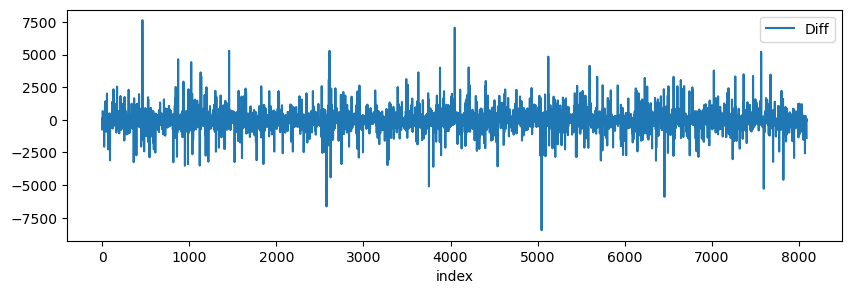

In [153]:
check.reset_index(inplace=True)

check.plot(x='index', y=['Diff'], kind='line', figsize=(10, 3));

In [154]:
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

603.4976390907063

In [130]:
test = pd.read_csv('../data/tests/one_hot_min_max_test.csv')


In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13485 non-null  int64  
 1   0           13485 non-null  float64
 2   1           13485 non-null  float64
 3   2           13485 non-null  float64
 4   3           13485 non-null  float64
 5   4           13485 non-null  float64
 6   5           13485 non-null  float64
 7   6           13485 non-null  float64
 8   7           13485 non-null  float64
 9   8           13485 non-null  float64
 10  9           13485 non-null  float64
 11  10          13485 non-null  float64
 12  11          13485 non-null  float64
 13  12          13485 non-null  float64
 14  13          13485 non-null  float64
 15  14          13485 non-null  float64
 16  15          13485 non-null  float64
 17  16          13485 non-null  float64
 18  17          13485 non-null  float64
 19  18          13485 non-nul

In [132]:
predictions = model.predict(test)
predictions

array([2315.49, 5087.3 , 8327.75, ..., 2673.37, 1487.08, 1078.37])

In [133]:
## export prediction

In [138]:
result = pd.DataFrame({'id': range(0, len(predictions)), 'price': predictions})
result

,id,price
0,0,2315.49
1,1,5087.30
2,2,8327.75
3,3,3102.26
4,4,1345.70
...,...,...
13480,13480,1739.43
13481,13481,2305.15
13482,13482,2673.37
13483,13483,1487.08


In [139]:
result.to_csv("../submissions/submision_one_hot_min_max_random_forest.csv", index=False)